In [112]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load the dataset
data = pd.read_csv('simulated_transaction_2024.csv')
data.head()

,Date,Timestamp,Account No,Balance,Amount,Third Party Account No,Third Party Name
0,01/01/2023,00:00,678330503.0,2971.0,1584.0,NaN,Westport Care Home
1,01/01/2023,00:00,472213568.0,3792.0,1950.0,NaN,Barbiee Boutique
2,01/01/2023,00:00,472213568.0,3012.0,-780.0,283027736.0,NaN
3,01/01/2023,00:00,283027736.0,1787.0,780.0,472213568.0,NaN
4,01/01/2023,00:00,624500124.0,3226.0,1825.0,NaN,Fat Face


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230596 entries, 0 to 230595
Data columns (total 7 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Date                    230367 non-null  object 
 1   Timestamp               230345 non-null  object 
 2   Account No              230372 non-null  float64
 3   Balance                 230350 non-null  float64
 4   Amount                  230387 non-null  float64
 5   Third Party Account No  6832 non-null    float64
 6   Third Party Name        223517 non-null  object 
dtypes: float64(4), object(3)
memory usage: 12.3+ MB


In [114]:
data.shape

(230596, 7)

In [115]:
data.columns

Index(['Date', 'Timestamp', 'Account No', 'Balance', 'Amount',
       'Third Party Account No', 'Third Party Name'],
      dtype='object')

In [116]:
data.dtypes

Date                       object
Timestamp                  object
Account No                float64
Balance                   float64
Amount                    float64
Third Party Account No    float64
Third Party Name           object
dtype: object

In [117]:
data.describe()

,Account No,Balance,Amount,Third Party Account No
count,2.303720e+05,230350.000000,230387.000000,6.832000e+03
mean,5.505993e+08,3609.351057,6.437717,5.370263e+08
std,2.560610e+08,5379.331174,508.200101,2.596927e+08
min,1.015313e+08,-5790.983500,-12240.000000,1.019085e+08
25%,3.314502e+08,373.453932,-74.000000,3.114679e+08
50%,5.501698e+08,1686.009850,-28.700000,5.381491e+08
75%,7.682718e+08,5215.031852,-12.060000,7.485097e+08
max,9.997527e+08,46804.158837,12240.000000,9.997527e+08


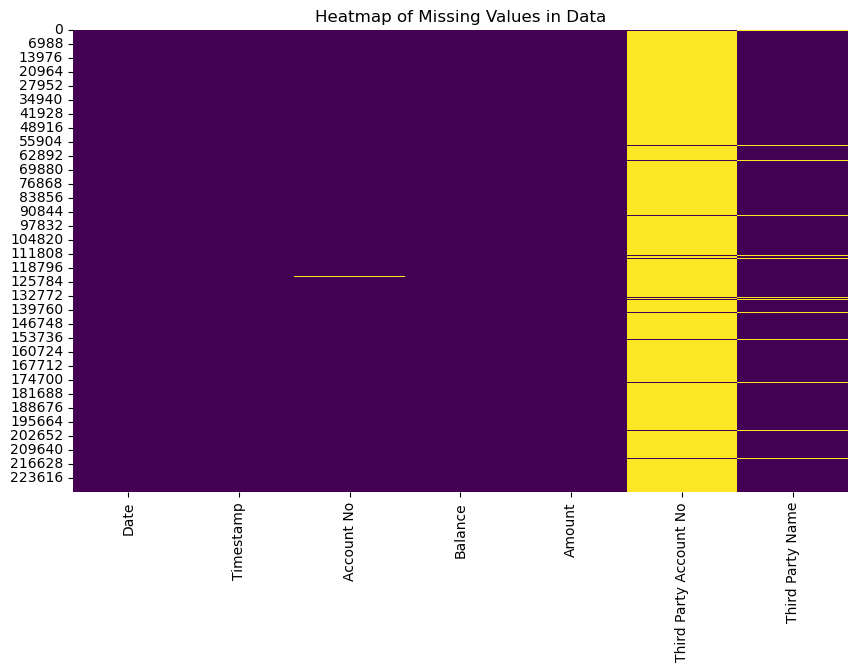

In [118]:
# Visualize missing values as a heatmap
plt.figure(figsize=(10,6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap of Missing Values in Data')
plt.show()

### This map is not giving clear missing values, as we have a large dataset, lets proceed normally

In [119]:
data.isnull().sum()

Date                         229
Timestamp                    251
Account No                   224
Balance                      246
Amount                       209
Third Party Account No    223764
Third Party Name            7079
dtype: int64

In [120]:
# Calculate the percentage of null values for each column
data.isnull().mean() * 100

Date                       0.099308
Timestamp                  0.108848
Account No                 0.097140
Balance                    0.106680
Amount                     0.090635
Third Party Account No    97.037243
Third Party Name           3.069871
dtype: float64

### i want to to check the number of transactions of other users, to get more details

In [121]:
# 'Account No' and number of transactions for each account
transactions_per_user = data.groupby('Account No').size()

transactions_count = transactions_per_user.reset_index(name='Number of Transactions')
transactions_count.head()

,Account No,Number of Transactions
0,101531259.0,123
1,104832000.0,164
2,105375973.0,158
3,106601471.0,193
4,108481285.0,368


In [122]:
# finding average number of transactions of all users
#avg_transaction_per_user = 
transactions_per_user.mean()
#avg_transaction_per_user

236.03688524590163

### we have 224 missing values in account number, i think we can create a random account number

In [123]:
# Generating unique account number to remove null values
existing_acc_numbers = pd.to_numeric(data['Account No'], errors='coerce').dropna().unique()
new_acc_number = int(max(existing_acc_numbers) + 1)

# Replace null values in the "Account No" column with the new account number
data['Account No'].fillna(new_acc_number, inplace=True)

# Verifyong that there are no null values in the "Account No" column
verification_result = data['Account No'].isnull().sum()

new_acc_number, verification_result

(999752673, 0)

In [124]:
print(data[(data['Account No'] == 999752673)  ])

              Date Timestamp   Account No       Balance   Amount  \
527     01/01/2023     00:00  999752673.0    813.000000 -1143.00   
1295    01/01/2023     00:00  999752673.0   2284.030000   -18.99   
1335    01/01/2023     00:00  999752673.0   1542.030000   -18.99   
1563    01/01/2023     00:00  999752673.0   3351.010000   -15.99   
1703    01/01/2023     00:00  999752673.0   3785.780000   -18.99   
...            ...       ...          ...           ...      ...   
223332  30/11/2023     23:59  999752673.0  -1043.893200    -7.99   
223657  30/11/2023     23:59  999752673.0  11517.049529   -15.99   
226353  30/11/2023     23:59  999752673.0  -1692.102105   -15.99   
229119  04/12/2023     10:03  999752673.0   2619.340104  -225.37   
230360  06/12/2023     11:34  999752673.0     30.958899  -111.36   

        Third Party Account No Third Party Name  
527                        NaN          Halifax  
1295                       NaN          PureGym  
1335                       NaN   

In [125]:
## float to integer
data['Account No'] = data['Account No'].astype(int)

In [126]:
# Convert 'Third Party Account No' to nullable integer type
data['Third Party Account No'] = data['Third Party Account No'].astype('Int64')

In [127]:
# Create a new 'Third Party' column
data['Third Party'] = data['Third Party Name'].combine_first(data['Third Party Account No'])

In [128]:
# Drop the original 'Third Party Account No' and 'Third Party Name' columns
data.drop(columns=['Third Party Account No', 'Third Party Name'], inplace=True)

In [129]:
data

,Date,Timestamp,Account No,Balance,Amount,Third Party
0,01/01/2023,00:00,678330503,2971.000000,1584.00,Westport Care Home
1,01/01/2023,00:00,472213568,3792.000000,1950.00,Barbiee Boutique
2,01/01/2023,00:00,472213568,3012.000000,-780.00,283027736
3,01/01/2023,00:00,283027736,1787.000000,780.00,472213568
4,01/01/2023,00:00,624500124,3226.000000,1825.00,Fat Face
...,...,...,...,...,...,...
230591,06/12/2023,20:54,581655972,45935.206861,-41.06,Tesco
230592,06/12/2023,20:55,786141370,-244.837500,-62.35,Sainsbury Local
230593,06/12/2023,21:05,824916823,9709.172159,-32.94,Deliveroo
230594,06/12/2023,21:13,366550080,26834.165794,-19.25,Amazon


In [130]:
data.isnull().sum()

Date           229
Timestamp      251
Account No       0
Balance        246
Amount         209
Third Party    247
dtype: int64

In [131]:
data['Account No'].nunique() ## total no.of users

977

In [132]:
## find unique and similarities

In [133]:
data.nunique()

Date              340
Timestamp        1401
Account No        977
Balance        229888
Amount          17314
Third Party       756
dtype: int64

1. Date and Timestamp
Method Used: Forward Fill
Why?
Both the Date and Timestamp fields are critical for maintaining the sequence and continuity in time series data.
Forward fill is appropriate here because it assumes that the missing date or timestamp can reasonably be replaced by the last known value, which is a common practice in time-sensitive data to maintain alignment in time series analysis.
This method helps avoid introducing artificial discontinuities in the time sequence, which could occur if we interpolated times or used backward fill.

In [134]:
# Fill missing Date and Timestamp
data['Date'] = data['Date'].fillna(method='ffill')
data['Timestamp'] = data['Timestamp'].fillna(method='ffill')

data.isnull().sum()

Date             0
Timestamp        0
Account No       0
Balance        246
Amount         209
Third Party    247
dtype: int64

In [135]:
# Convert the 'not_happened_yet_date' column to datetime
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

### i want to impute the missing values in amount and balance column  as well, but I have observed some abnormalities in account transactions

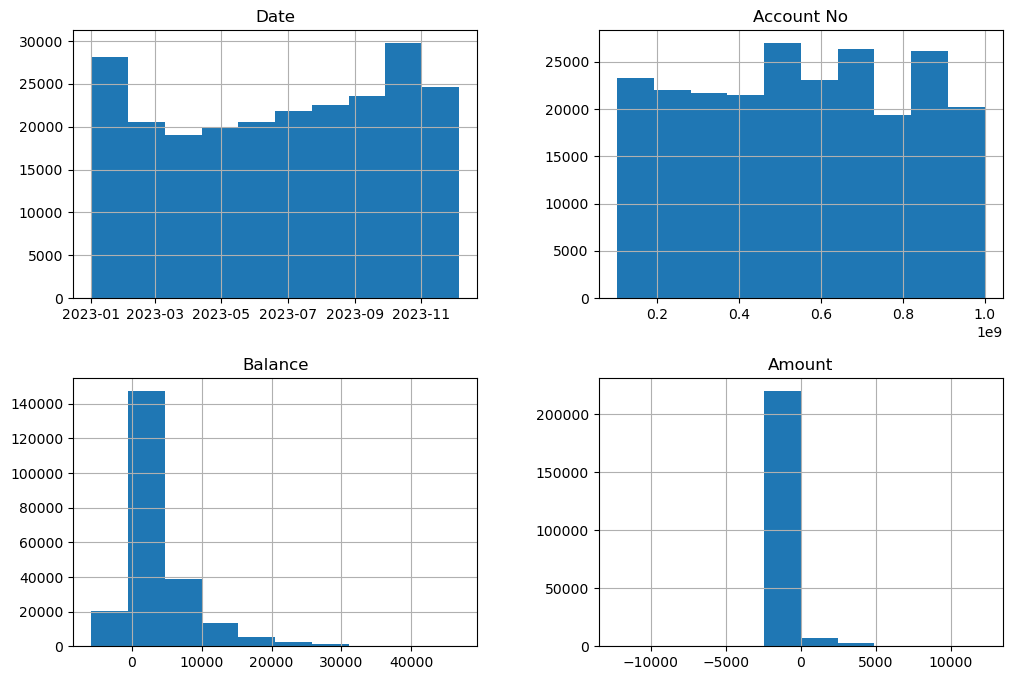

In [136]:
data.hist( figsize = (12,8) )
plt.show() ## to see the distributions of data

In [137]:
data.isnull().sum()

Date             0
Timestamp        0
Account No       0
Balance        246
Amount         209
Third Party    247
dtype: int64

## how to impute amount and balance column 

## analyze the relationship between transaction direction (debit/credit) and balance:
1. Segment the Data
2. Statistical Summary
3. Visual Analysis

In [138]:
# Identify debits and credits
debits = data[data['Amount'] < 0]
credits = data[data['Amount'] > 0]

In [139]:
# Calculate statistics for debits and credits
debit_stats = debits['Balance'].describe()
credit_stats = credits['Balance'].describe()

print("Debit Statistics:\n", debit_stats)
print("\nCredit Statistics:\n", credit_stats)

Debit Statistics:
 count    219720.000000
mean       3614.063005
std        5413.275727
min       -5790.983500
25%         353.936729
50%        1655.662325
75%        5270.588609
max       46184.158837
Name: Balance, dtype: float64

Credit Statistics:
 count    10412.000000
mean      3504.925524
std       4583.028230
min      -4678.910000
25%        868.477202
50%       2137.070230
75%       4362.312796
max      46804.158837
Name: Balance, dtype: float64


In [140]:
# Sort data by Date and Account No
data.sort_values(by=['Account No', 'Date'], inplace=True)

# Forward fill missing Balance and Amount
data['Balance'] = data.groupby('Account No')['Balance'].fillna(method='ffill')
data['Amount'] = data.groupby('Account No')['Amount'].fillna(method='ffill')

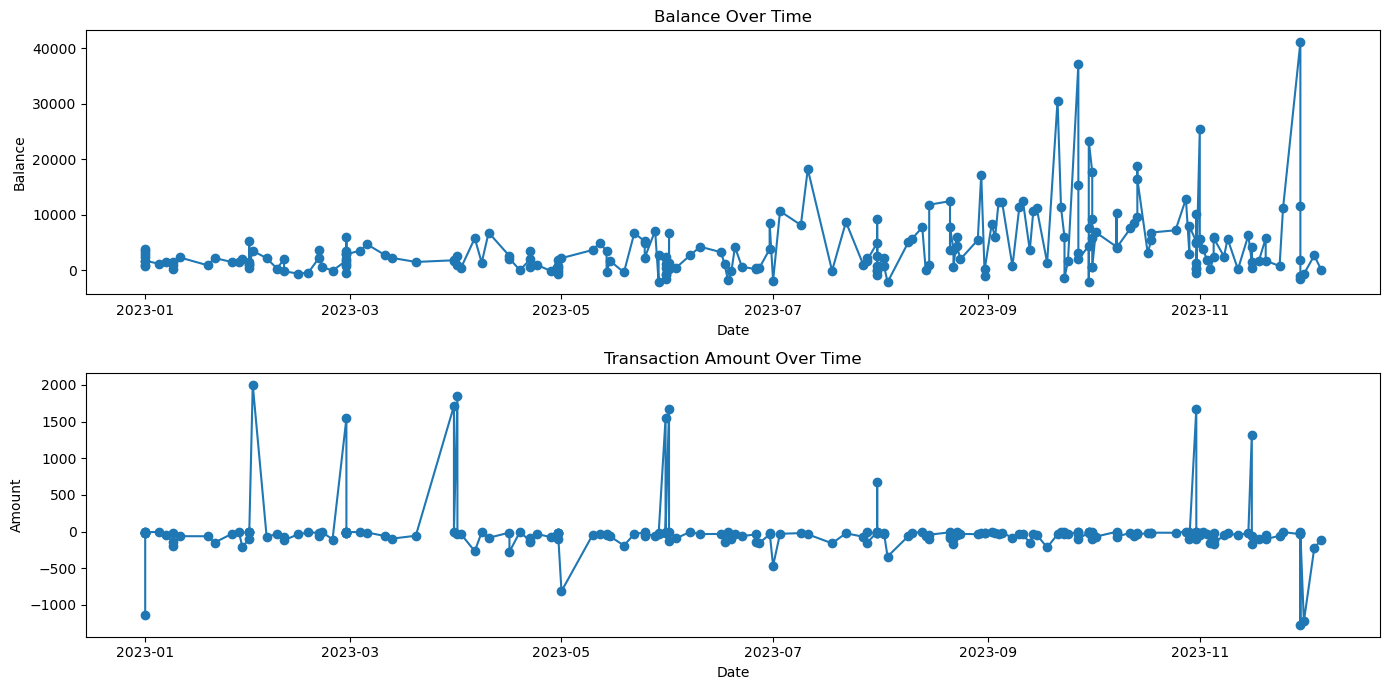

In [141]:
# Optional: Plot to visualize imputation effects
import matplotlib.pyplot as plt

# Filter for a specific account to visualize
sample_account = data[data['Account No'] == 999752673]  # Replace some_account_number with an actual number

plt.figure(figsize=(14, 7))
plt.subplot(2, 1, 1)
plt.plot(sample_account['Date'], sample_account['Balance'], marker='o', linestyle='-')
plt.title('Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Balance')

plt.subplot(2, 1, 2)
plt.plot(sample_account['Date'], sample_account['Amount'], marker='o', linestyle='-')
plt.title('Transaction Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Amount')

plt.tight_layout()
plt.show()

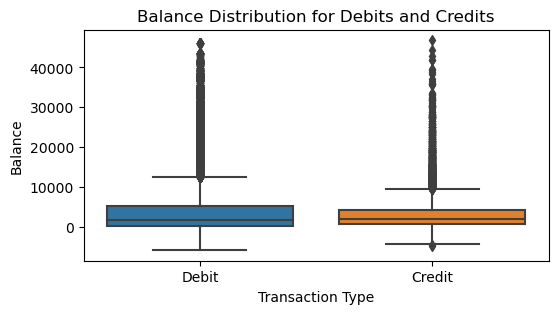

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns

# Label the transactions as debit or credit
data['Transaction Type'] = ['Credit' if amt > 0 else 'Debit' for amt in data['Amount']]

# Plotting the distribution of Balances for debits and credits
plt.figure(figsize=(6,3))
sns.boxplot(x='Transaction Type', y='Balance', data=data)
plt.title('Balance Distribution for Debits and Credits')
plt.xlabel('Transaction Type')
plt.ylabel('Balance')
plt.show()

In [143]:
# Interpolate missing values for Balance and Amount
#data['Balance'] = data['Balance'].interpolate(method='linear')
#data['Amount'] = data['Amount'].interpolate(method='linear')

In [144]:
# nearest integer/ rounding
data['Balance'] = data['Balance'].round().astype(int)
data['Amount'] = data['Amount'].round().astype(int)

In [145]:
# Calculate statistics for debits and credits
debit_stats = debits['Balance'].describe()
credit_stats = credits['Balance'].describe()

In [146]:
debit_stats

count    219720.000000
mean       3614.063005
std        5413.275727
min       -5790.983500
25%         353.936729
50%        1655.662325
75%        5270.588609
max       46184.158837
Name: Balance, dtype: float64

In [147]:
credit_stats

count    10412.000000
mean      3504.925524
std       4583.028230
min      -4678.910000
25%        868.477202
50%       2137.070230
75%       4362.312796
max      46804.158837
Name: Balance, dtype: float64

In [148]:
import pandas as pd

# Assuming you have a DataFrame named 'data' containing your transaction data
# Make sure you have columns named 'Date' and 'Timestamp' representing date and time respectively

# Convert 'Date' and 'Timestamp' columns to string type if they're not already
data['Date'] = data['Date'].astype(str)
data['Timestamp'] = data['Timestamp'].astype(str)

# Concatenate date and time columns
data['Datetime'] = data['Date'] + ' ' + data['Timestamp']

# Convert the concatenated string to datetime data type
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Drop the original date and time columns if needed
data = data.drop(columns=['Date', 'Timestamp'])


In [149]:
# Reorder the columns with 'Datetime' as the first column
data = data[['Datetime'] + [col for col in data.columns if col != 'Datetime']]

In [150]:
data

,Datetime,Account No,Balance,Amount,Third Party,Transaction Type
912,2023-01-01 00:00:00,101531259,124,-859,LBG,Debit
4036,2023-01-01 00:00:00,101531259,116,-8,Disney,Debit
4037,2023-01-01 00:00:00,101531259,16,-100,Grand Union BJJ,Debit
4743,2023-01-01 09:37:00,101531259,-64,-80,Matalan,Debit
5133,2023-01-01 12:00:00,101531259,-248,-184,Matalan,Debit
...,...,...,...,...,...,...
223657,2023-11-30 23:59:00,999752673,11517,-16,Netflix,Debit
226353,2023-11-30 23:59:00,999752673,-1692,-16,Netflix,Debit
222727,2023-12-01 00:00:00,999752673,-731,-1226,Halifax,Debit
229119,2023-12-04 10:03:00,999752673,2619,-225,Topshop,Debit


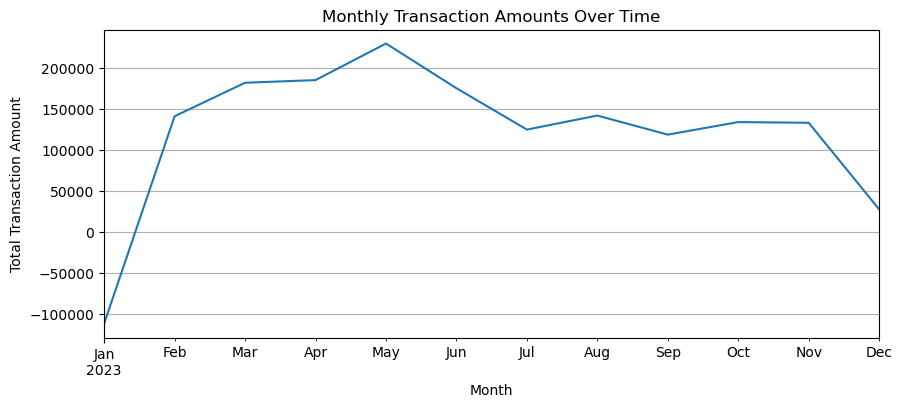

In [151]:
import matplotlib.pyplot as plt

# Resample data on a monthly basis and calculate the sum of transaction amounts
monthly_transactions = data.resample('M', on='Datetime')['Amount'].sum()

# Plot the monthly transaction amounts
plt.figure(figsize=(10, 4))
monthly_transactions.plot(title='Monthly Transaction Amounts Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()

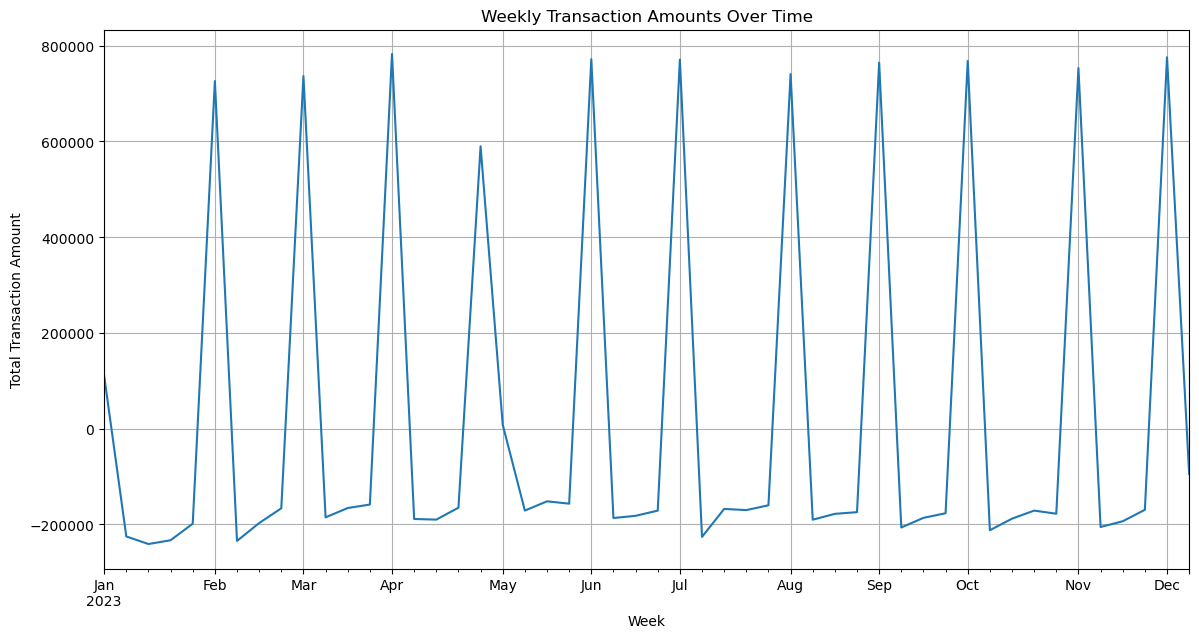

In [152]:
# Resample data on a weekly basis and calculate the sum of transaction amounts
weekly_transactions = data.resample('W', on='Datetime')['Amount'].sum()

# Plot the weekly transaction amounts
plt.figure(figsize=(14, 7))
weekly_transactions.plot(title='Weekly Transaction Amounts Over Time')
plt.xlabel('Week')
plt.ylabel('Total Transaction Amount')
plt.grid(True)
plt.show()

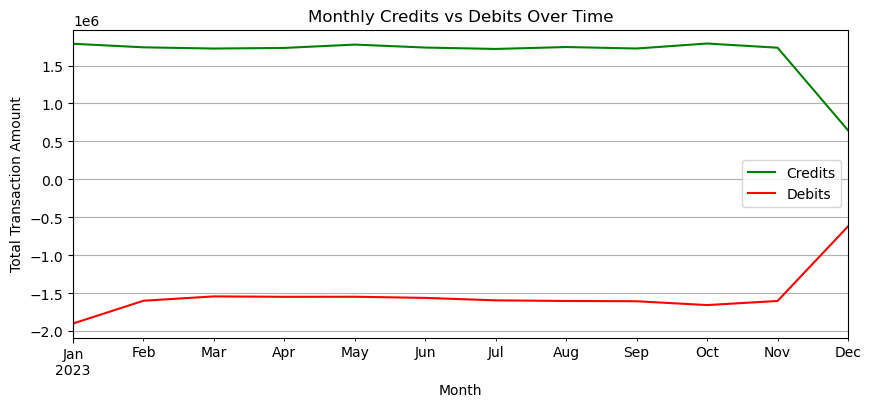

In [153]:
# Separate credits and debits
credits = data[data['Amount'] > 0]
debits = data[data['Amount'] < 0]

# Resample credits and debits on a monthly basis and calculate the sum of transaction amounts
monthly_credits = credits.resample('M', on='Datetime')['Amount'].sum()
monthly_debits = debits.resample('M', on='Datetime')['Amount'].sum()

# Plot the monthly transaction amounts for credits and debits
plt.figure(figsize=(10,4))
monthly_credits.plot(label='Credits', color='green')
monthly_debits.plot(label='Debits', color='red')
plt.title('Monthly Credits vs Debits Over Time')
plt.xlabel('Month')
plt.ylabel('Total Transaction Amount')
plt.legend()
plt.grid(True)
plt.show()

## Key Observations:

Volatility: The debits seem more volatile compared to credits, which could indicate varying spending habits or payment cycles.

Trends: There might be specific months where credits or debits peak, which could correspond to seasonal factors, tax periods, or other cyclical events affecting transaction volumes.

In [154]:
# Calculate weekly changes in transaction amounts
weekly_changes = weekly_transactions.diff()

# Identify top 5 weeks with the largest positive and negative changes
top_increases = weekly_changes.nlargest(5)
top_decreases = weekly_changes.nsmallest(5)

# Filter data to include only the weeks identified
significant_weeks = pd.concat([top_increases, top_decreases]).sort_index()
significant_weeks_dates = significant_weeks.index

# Filter the original data for the significant weeks to look at transaction details
significant_transactions = data[(data['Datetime'] >= significant_weeks_dates.min()) & 
                                (data['Datetime'] <= significant_weeks_dates.max())]

#significant_transactions.head(), top_increases, top_decreases

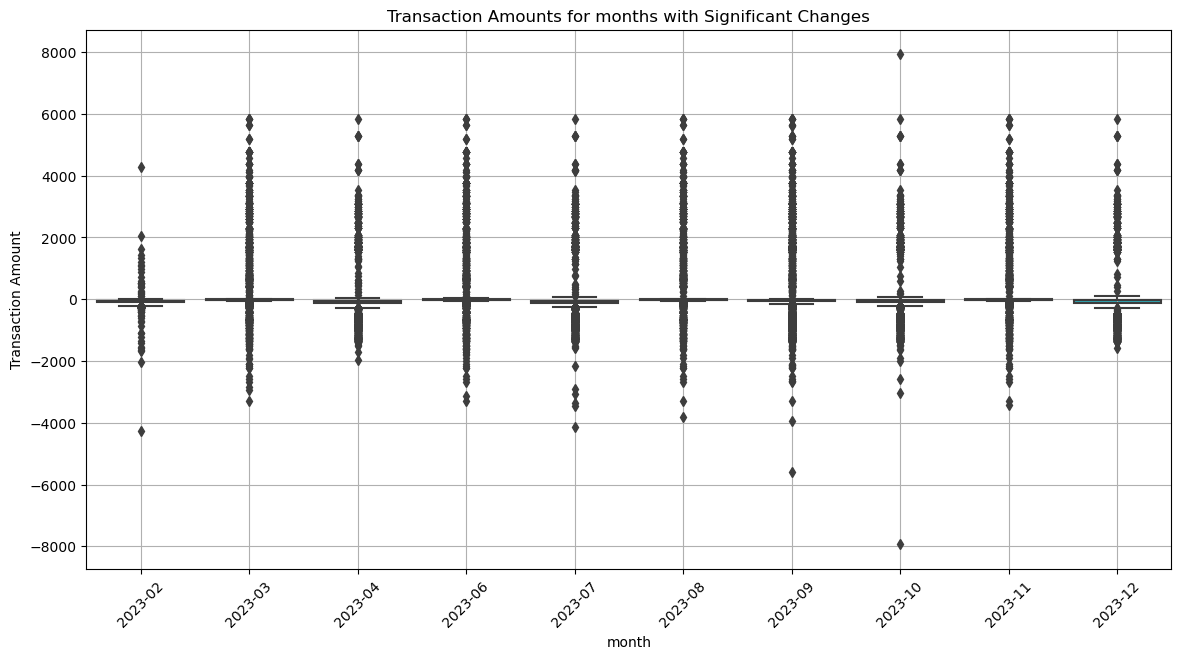

In [155]:
import seaborn as sns

# Create a subset for visualization based on significant weeks
visual_subset = data[data['Datetime'].dt.week.isin(significant_weeks_dates.week)]

# Plot transaction amounts for significant weeks
plt.figure(figsize=(14, 7))
sns.boxplot(x=visual_subset['Datetime'].dt.strftime('%Y-%m'), y='Amount', data=visual_subset)
plt.xticks(rotation=45)
plt.title('Transaction Amounts for months with Significant Changes')
plt.xlabel('month')
plt.ylabel('Transaction Amount')
plt.grid(True)
plt.show()

In [156]:
# Calculate the interquartile range to determine outliers in transaction amounts
Q1 = data['Amount'].quantile(0.25)
Q3 = data['Amount'].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Filter transactions that are outliers
outlier_transactions = data[(data['Amount'] > upper_bound) | (data['Amount'] < lower_bound)]

# Display outlier transactions
outlier_transactions.head(), outlier_transactions.describe()


(                 Datetime  Account No  Balance  Amount Third Party  \
 912   2023-01-01 00:00:00   101531259      124    -859         LBG   
 5133  2023-01-01 12:00:00   101531259     -248    -184     Matalan   
 5200  2023-01-01 12:28:00   101531259     -446    -198     Topshop   
 11842 2023-01-13 03:00:00   101531259    -1072    -200        Head   
 20243 2023-01-31 00:00:00   101531259      427    1542  Hobbycraft   
 
       Transaction Type  
 912              Debit  
 5133             Debit  
 5200             Debit  
 11842            Debit  
 20243           Credit  ,
          Account No       Balance        Amount
 count  2.840600e+04  28406.000000  28406.000000
 mean   5.459440e+08   2960.181581    349.826656
 std    2.559722e+08   4589.196341   1396.531291
 min    1.015313e+08  -5743.000000 -12240.000000
 25%    3.314502e+08    398.000000   -578.000000
 50%    5.501698e+08   1578.000000   -202.000000
 75%    7.607041e+08   3789.750000   1545.000000
 max    9.997527e+08  4

## observations:
Count: 28,533 transactions are identified as outliers.

Mean Balance: 2,959.32, which indicates the average account balance after these transactions.

Amount Range: From -12,240 to 12,240, showing both large credits and debits.

Standard Deviation in Amount: 1,393.51, indicating a high variance in transaction amounts among outliers.

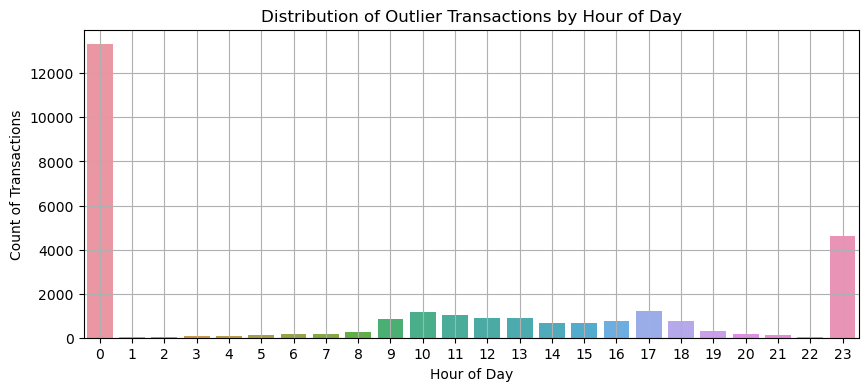

In [157]:
# Extract the hour from the Datetime for analysis
outlier_transactions['Hour'] = outlier_transactions['Datetime'].dt.hour

# Plot the distribution of outlier transactions across different hours of the day
plt.figure(figsize=(10, 4))
sns.countplot(x='Hour', data=outlier_transactions)
plt.title('Distribution of Outlier Transactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Transactions')
plt.grid(True)
plt.show()

## Insights
Nighttime Transactions: Elevated levels of transaction activity during late hours could indicate fraudulent behavior, as these times are typically off-peak for regular consumer transactions.

Regular Business Hours Activity: While there is also activity during regular hours, the spikes during unusual hours warrant closer scrutiny.

In [158]:
# Count the number of outlier transactions for each account
account_outlier_counts = outlier_transactions['Account No'].value_counts()

# Merge this with the main data to see if these accounts also show unusual transaction times
outlier_accounts = pd.DataFrame(account_outlier_counts).reset_index()
outlier_accounts.columns = ['Account No', 'Outlier Count']

# Examine accounts with the highest number of outlier transactions
high_outlier_accounts = outlier_accounts[outlier_accounts['Outlier Count'] > outlier_accounts['Outlier Count'].quantile(0.95)]

# Display the details of accounts with high outlier transactions
high_outlier_accounts.head(), high_outlier_accounts.describe()


(   Account No  Outlier Count
 0   673025413             78
 1   678330503             78
 2   475277431             77
 3   979135922             76
 4   385685918             75,
          Account No  Outlier Count
 count  4.600000e+01      46.000000
 mean   5.116905e+08      60.282609
 std    2.429314e+08       7.434643
 min    1.161696e+08      53.000000
 25%    3.442264e+08      54.250000
 50%    4.773671e+08      58.000000
 75%    6.770042e+08      63.500000
 max    9.791359e+08      78.000000)

In [159]:
data['Third Party'].nunique()

756

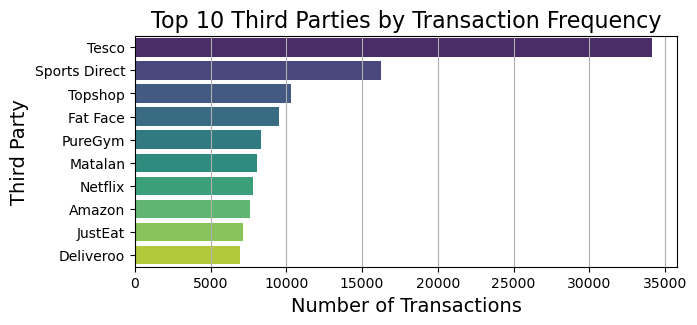

In [160]:
top_parties = data['Third Party'].value_counts().head(10)

plt.figure(figsize=(7,3))
sns.barplot(x=top_parties.values, y=top_parties.index, palette='viridis')
plt.title('Top 10 Third Parties by Transaction Frequency', fontsize=16)
plt.xlabel('Number of Transactions', fontsize=14)
plt.ylabel('Third Party', fontsize=14)
plt.grid(True, axis='x')
plt.show()

# Temporal analysis:

         Account No        Balance         Amount
count  2.305960e+05  230596.000000  230596.000000
mean   5.510356e+08    3609.644148       6.427349
std    2.563188e+08    5379.737808     508.112658
min    1.015313e+08   -5791.000000  -12240.000000
25%    3.314502e+08     374.000000     -74.000000
50%    5.501698e+08    1686.000000     -29.000000
75%    7.693115e+08    5215.000000     -12.000000
max    9.997527e+08   46804.000000   12240.000000
Debit     220172
Credit     10424
Name: Transaction Type, dtype: int64
Datetime              0
Account No            0
Balance               0
Amount                0
Third Party         247
Transaction Type      0
dtype: int64


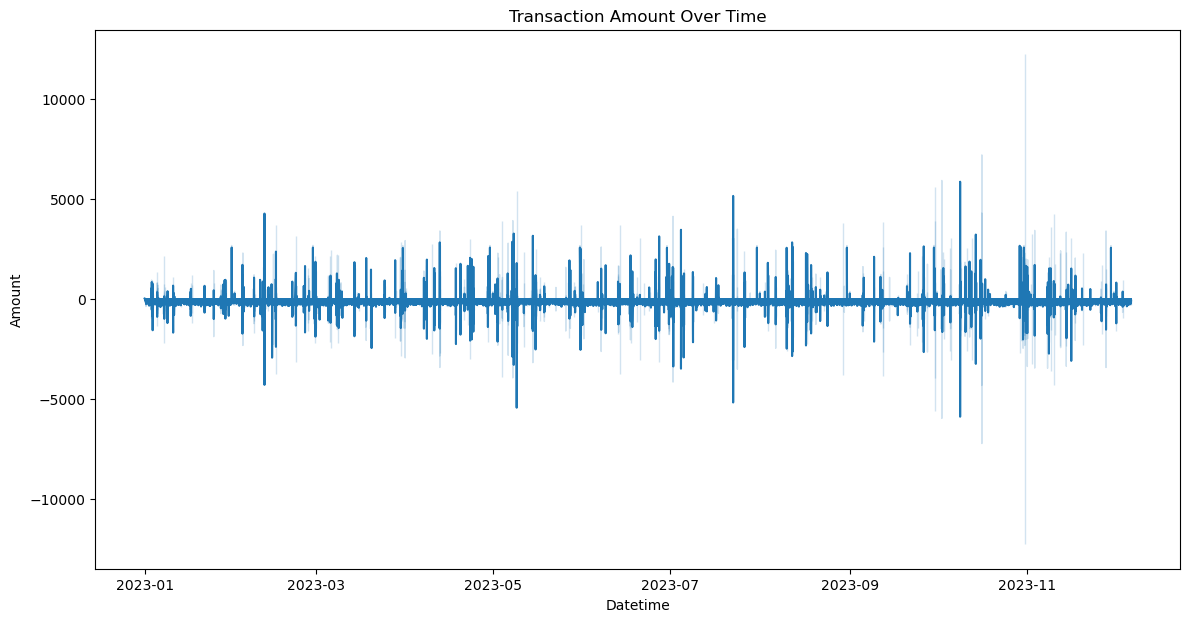

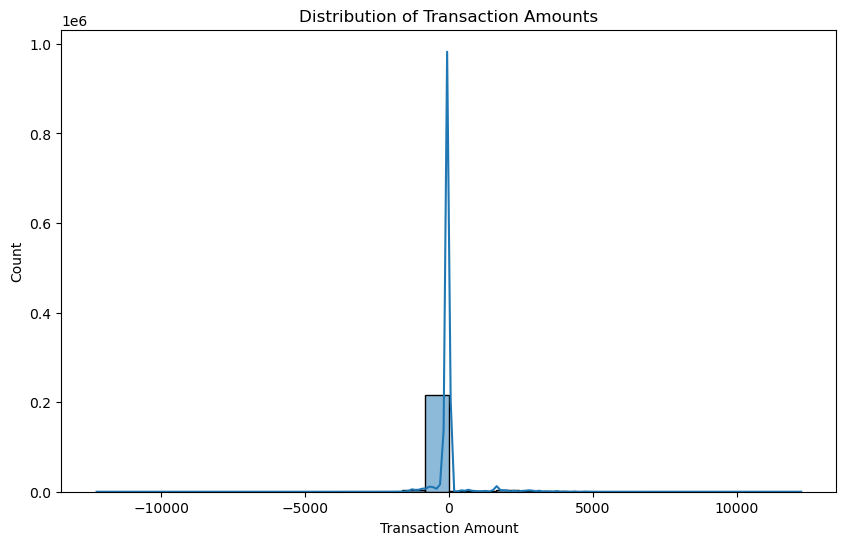

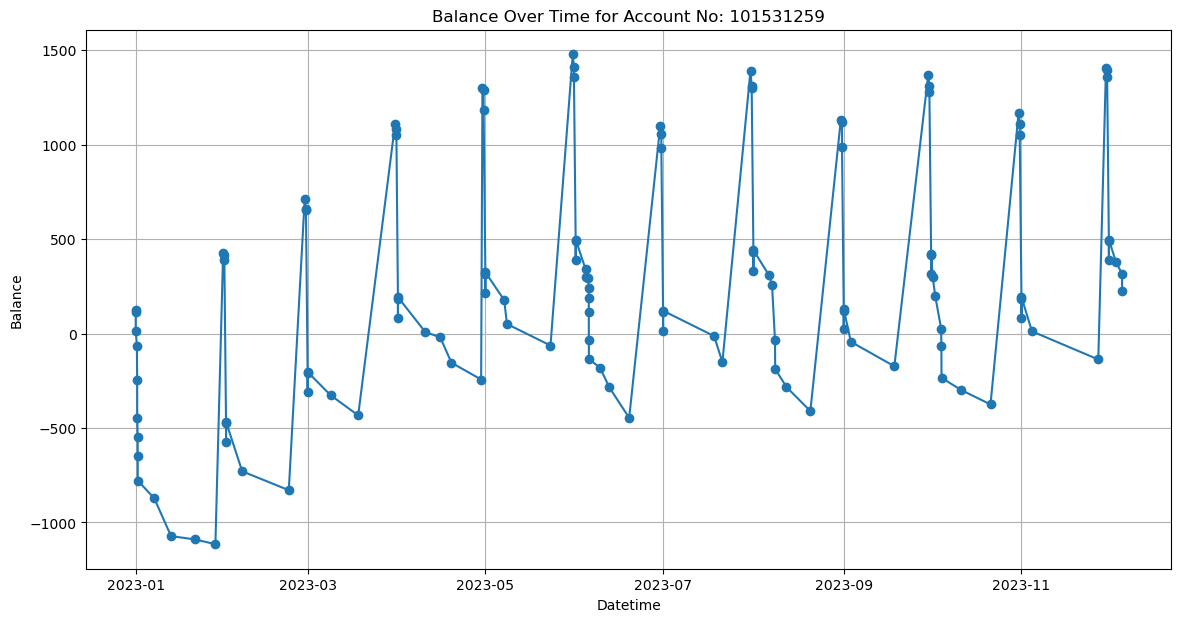

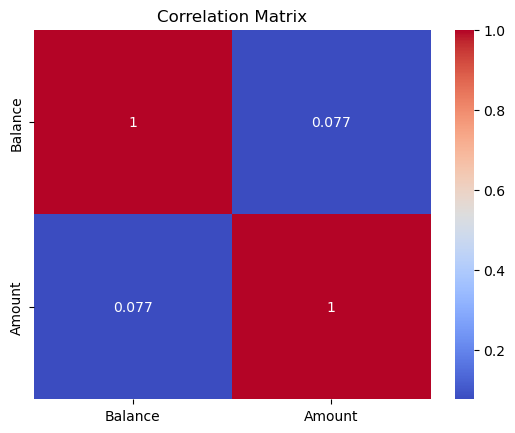

In [161]:
## EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Descriptive statistics
print(data.describe())
print(data['Transaction Type'].value_counts())

# Missing values check
print(data.isnull().sum())

# New features
data['Day of Week'] = data['Datetime'].dt.day_name()
data['Hour of Day'] = data['Datetime'].dt.hour

# Transaction trends
plt.figure(figsize=(14, 7))
sns.lineplot(x='Datetime', y='Amount', data=data)
plt.title('Transaction Amount Over Time')
plt.xlabel('Datetime')
plt.ylabel('Amount')
plt.show()

# Distribution of transactions
plt.figure(figsize=(10, 6))
sns.histplot(data['Amount'], bins=30, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.show()

# Balance over time for a specific account
sample_account = data[data['Account No'] == data['Account No'].unique()[0]]
plt.figure(figsize=(14, 7))
plt.plot(sample_account['Datetime'], sample_account['Balance'], marker='o')
plt.title('Balance Over Time for Account No: {}'.format(sample_account['Account No'].iloc[0]))
plt.xlabel('Datetime')
plt.ylabel('Balance')
plt.grid(True)
plt.show()

# Correlation matrix
corr = data[['Balance', 'Amount']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

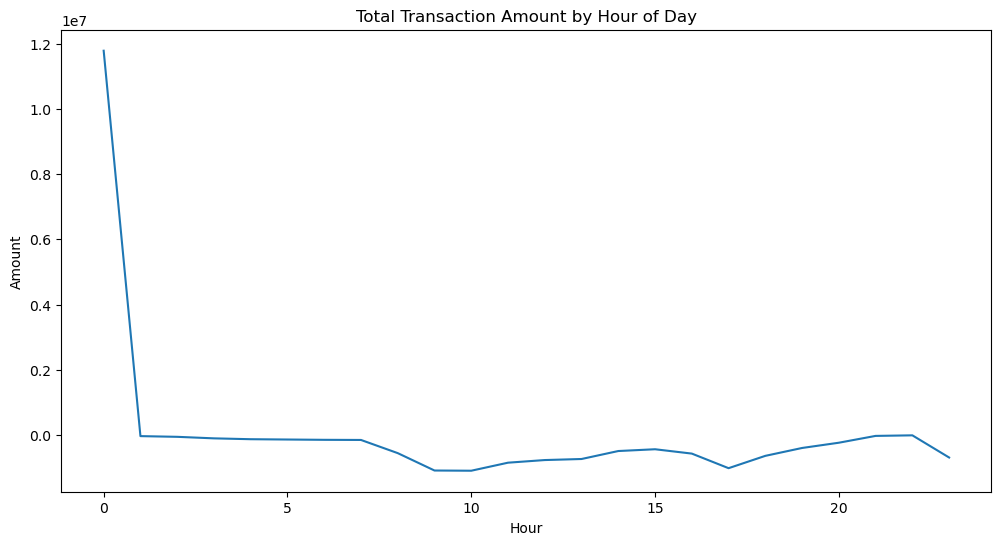

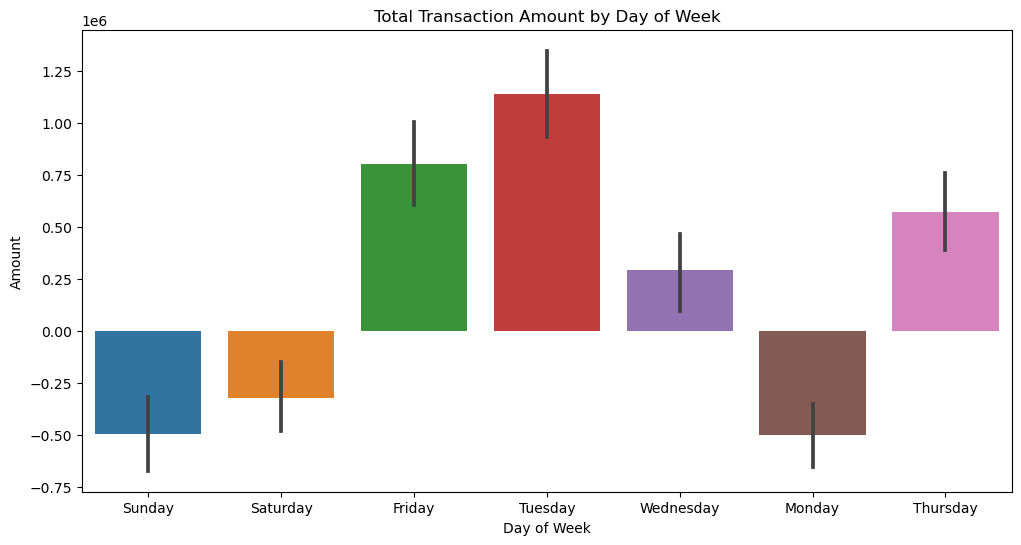

In [162]:
# Assuming data is already loaded into a DataFrame named `data`
# Convert 'Datetime' from string to datetime format if not already done
data['Datetime'] = pd.to_datetime(data['Datetime'])

# Create time-based features
data['Hour'] = data['Datetime'].dt.hour
data['Day of Week'] = data['Datetime'].dt.day_name()
data['Month'] = data['Datetime'].dt.month

# Plot transactions over time to identify peaks
plt.figure(figsize=(12, 6))
sns.lineplot(x='Hour', y='Amount', data=data, estimator=sum, ci=None)
plt.title('Total Transaction Amount by Hour of Day')
plt.show()

# Analyzing transactions by day of week
plt.figure(figsize=(12, 6))
sns.barplot(x='Day of Week', y='Amount', data=data, estimator=sum)
plt.title('Total Transaction Amount by Day of Week')
plt.show()

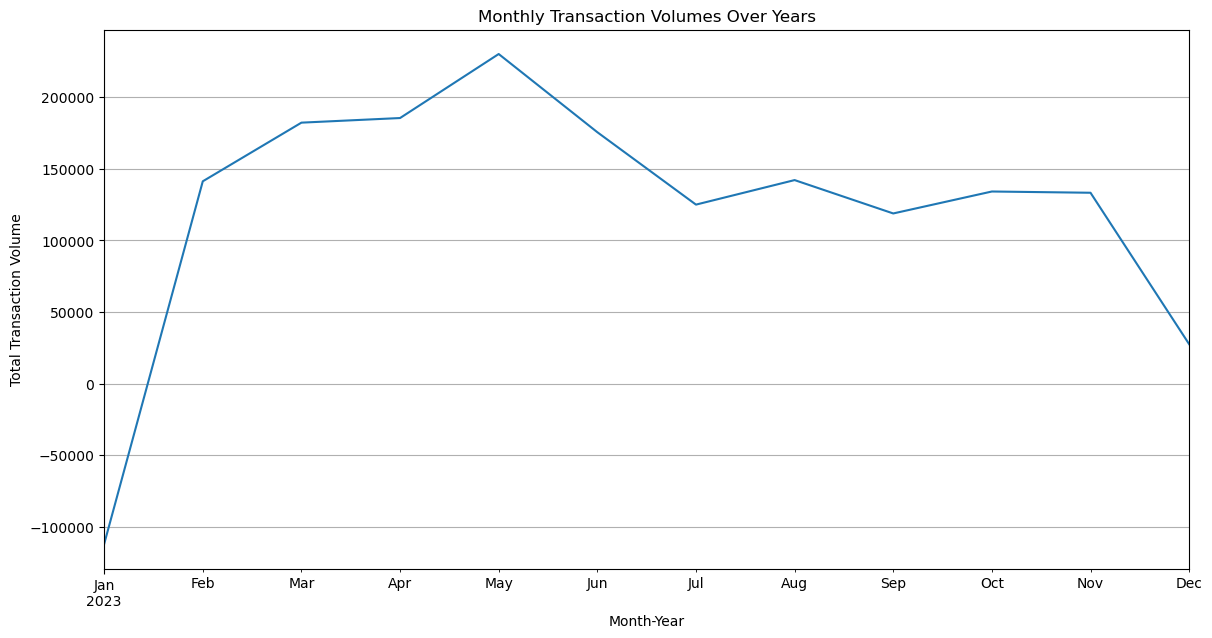

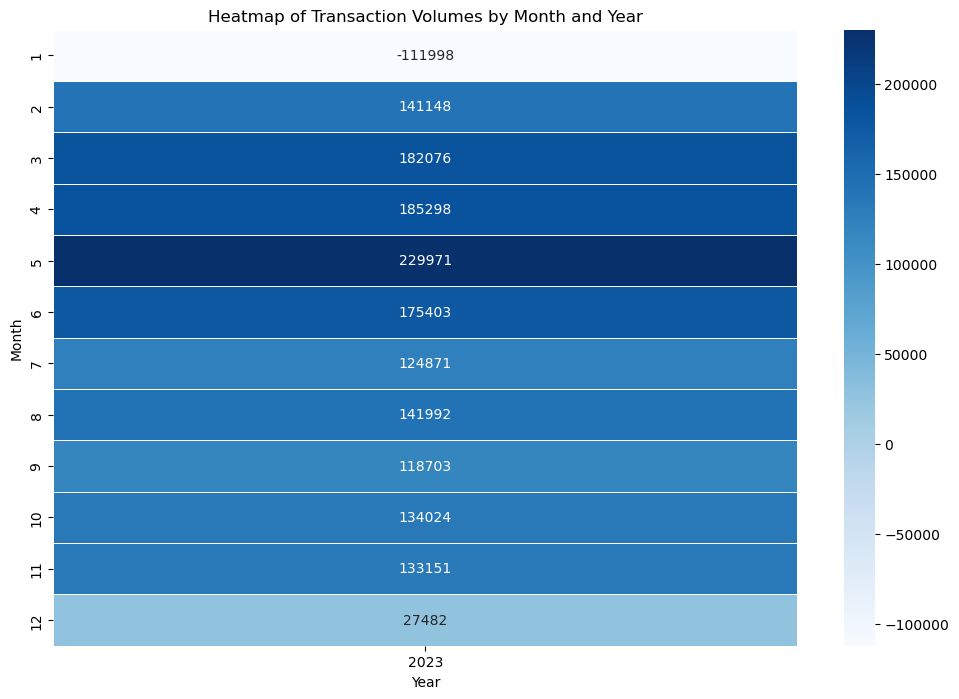

In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and prepare the data
data['Month-Year'] = data['Datetime'].dt.to_period('M')
monthly_data = data.groupby('Month-Year')['Amount'].sum()

# Plotting a line graph of monthly transaction volumes over multiple years
plt.figure(figsize=(14, 7))
monthly_data.plot(title='Monthly Transaction Volumes Over Years')
plt.xlabel('Month-Year')
plt.ylabel('Total Transaction Volume')
plt.grid(True)
plt.show()

# Creating a heatmap of monthly data for multiple years
data['Year'] = data['Datetime'].dt.year
data['Month'] = data['Datetime'].dt.month
pivot_table = data.pivot_table(values='Amount', index='Month', columns='Year', aggfunc='sum')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", linewidths=.5, cmap='Blues')
plt.title('Heatmap of Transaction Volumes by Month and Year')
plt.xlabel('Year')
plt.ylabel('Month')
plt.show()


In [164]:
## marketing

In [165]:
data['Third Party Name'] = data['Third Party'].apply(lambda x: x if isinstance(x, str) else None)
data['Third Party Account No'] = data['Third Party'].apply(lambda x: x if isinstance(x, int) else None)

In [166]:
data['Third Party Name'] = data['Third Party Name'].str.upper().str.strip()

In [167]:
frequent_parties = data['Third Party Name'].value_counts().head(10)

In [168]:
pivot_data = data.pivot_table(values='Amount', index='Third Party Name', aggfunc=['sum', 'count'])

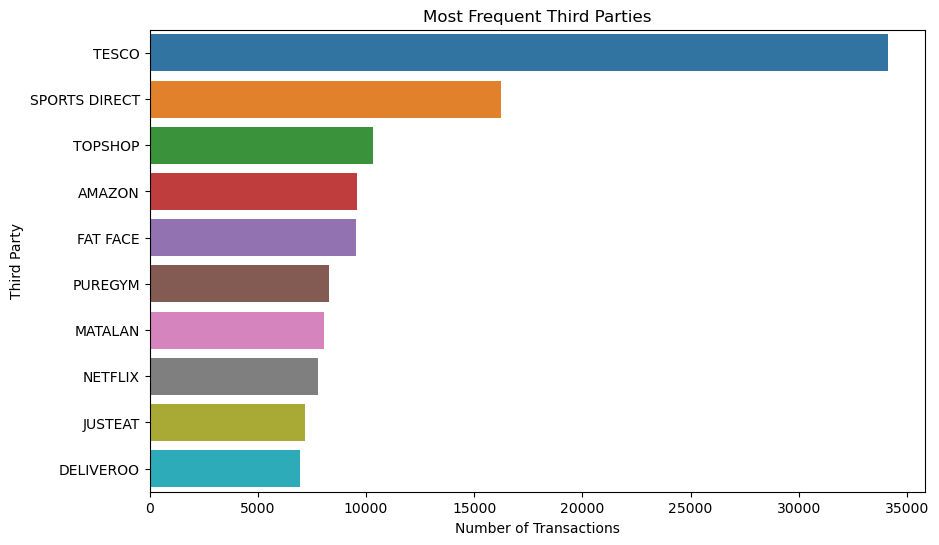

In [169]:
import seaborn as sns
import matplotlib.pyplot as plt

# Top third parties by transaction count
plt.figure(figsize=(10, 6))
sns.barplot(x=frequent_parties.values, y=frequent_parties.index)
plt.title('Most Frequent Third Parties')
plt.xlabel('Number of Transactions')
plt.ylabel('Third Party')
plt.show()

### Targeted Offers
Co-branded Campaigns: Partner with popular third parties identified in the data, like Tesco or Amazon, to create co-branded offers. For instance, a "Shop with Tesco and save on your next bank service fee" campaign can drive transactions and build loyalty.

Reward Programs: Develop rewards programs that incentivize customers to shop with these third parties. For example, double the reward points when using your bank's credit card at any of the top third-party merchants.

Exclusive Deals: Negotiate exclusive deals or discounts with these third parties for your customers. If Fat Face is a popular merchant, an exclusive 10% discount for your bank's customers can be a strong incentive.

Bundle Offers: Bundle banking services with third-party offerings. For instance, new account sign-ups could come with discount vouchers for Sports Direct or free delivery from Deliveroo.

In [170]:
import pandas as pd

# Assuming 'data' is your DataFrame loaded from earlier analysis or an external file
# Example loading step if needed: data = pd.read_csv('path_to_your_data.csv')

# Spending Habit Analysis
# Sum up transactions for each 'Third Party' to identify spending habits
spending_habits = data.groupby('Third Party')['Amount'].sum().sort_values(ascending=False)

# Customer Profiling
# Create customer profiles based on their transactions with specific third parties
def identify_profile(third_party):
    if 'Amazon' in third_party:
        return 'Tech-Savvy Shopper'
    elif 'PureGym' in third_party:
        return 'Fitness Enthusiast'
    elif 'Sports Direct' in third_party:
        return 'Sports Equipment Lover'
    else:
        return 'General Shopper'

data['Customer Profile'] = data['Third Party'].apply(identify_profile)

# Personalized Communication
# Prepare personalized messages for different customer segments
personalized_messages = {
    'Tech-Savvy Shopper': "Explore the latest gadgets on Amazon with our exclusive card rewards!",
    'Fitness Enthusiast': "Stay fit! Enjoy special offers from PureGym just for you.",
    'Sports Equipment Lover': "Get the best deals on sports gear from Sports Direct with our special discounts!",
    'General Shopper': "Enjoy cashback on all your purchases with our universal reward card."
}

# Apply personalized messages to the dataset
data['Personalized Message'] = data['Customer Profile'].map(personalized_messages)

# Product Customization
# Suggest products based on customer profiles
product_suggestions = {
    'Tech-Savvy Shopper': 'High-Tech Rewards Card',
    'Fitness Enthusiast': 'Fitness Fanatic Credit Card',
    'Sports Equipment Lover': 'Sports Rewards Card',
    'General Shopper': 'Standard Cashback Card'
}

data['Suggested Product'] = data['Customer Profile'].map(product_suggestions)

# Display the enhanced dataset with profiles, messages, and product suggestions
print(data[['Customer ID', 'Third Party', 'Customer Profile', 'Personalized Message', 'Suggested Product']])


TypeError: argument of type 'int' is not iterable

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame and has the necessary columns
# Select the features you want to use for clustering
X = data[['Balance', 'Amount']].dropna()  # Dropping NA values to avoid errors during fitting

# Scale the data if necessary - Here we are assuming it's already appropriately scaled for simplicity

# Initialize KMeans with three clusters
kmeans = KMeans(n_clusters=3, random_state=0)
# Fit the model and predict cluster indices for X
X['Cluster'] = kmeans.fit_predict(X)

# Append cluster information back to the original data
data = data.join(X['Cluster'], how='left', rsuffix='_cluster')

# Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster').agg({
    'Balance': ['mean', 'std'],
    'Amount': ['mean', 'std', 'count']
})
print(cluster_summary)

# Visualize the clusters
sns.scatterplot(x='Balance', y='Amount', hue='Cluster', data=X, palette='viridis')
plt.title('Customer Segmentation by Balance and Transaction Amount')
plt.xlabel('Balance')
plt.ylabel('Amount')
plt.legend(title='Cluster')
plt.show()


## Transactions that are several standard deviations away from the mean might be considered suspicious:
- Transactions that are several standard deviations away from the mean might be considered suspicious:

In [ ]:
# Calculate the mean and standard deviation
mean_amount = data['Amount'].mean()
std_amount = data['Amount'].std()

# Identify outliers as transactions that are more than 3 standard deviations from the mean
outliers = data[np.abs(data['Amount'] - mean_amount) > 3 * std_amount]

# Display outliers
outliers[['Date', 'Amount', 'Account No', 'Third Party', 'Transaction Direction']]

## transactions occurring repeatedly at the same time to the same third party, which could indicate automated or scripted fraud:
- more than 5 times

In [ ]:
# Group by account number, third party, and hour to see repetitive patterns
repetitive_patterns = data.groupby(['Account No', 'Third Party', 'Timestamp']).size().reset_index(name='Count')

# Filter for patterns that occur more than a threshold, e.g., more than 5 times
suspicious_patterns = repetitive_patterns[repetitive_patterns['Count'] > 5]

# Display suspicious repetitive patterns
suspicious_patterns


## Visualisations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amounts for outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Amount', hue='Transaction Direction', data=outliers)
plt.title('Outlier Transactions Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot transaction amounts for potential outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Amount', hue='Transaction Direction', style='Day of Week', data=data)
plt.title('Transaction Amounts Over Time')
plt.xlabel('Date')
plt.ylabel('Transaction Amount')
plt.show()


In [ ]:
# Create pairplot for selected columns to visualize relationships and distributions
sns.pairplot(data[['Amount', 'Balance', 'Transaction Direction']], hue='Transaction Direction', plot_kws={'alpha': 0.5})
plt.suptitle('Pairplot of Transactions', size=16, y=1.02)
plt.show()

In [ ]:
##

In [ ]:
# Create individual scatter plots instead of a pairplot to avoid issues with KDE and non-numeric data types
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot of Amount vs. Balance
sns.scatterplot(x='Amount', y='Balance', hue='Transaction Direction', data=data, ax=axs[0], alpha=0.5)
axs[0].set_title('Scatter Plot of Amount vs. Balance')
axs[0].set_xlabel('Amount')
axs[0].set_ylabel('Balance')

# Scatter plot of Amount vs. Hour of Transaction
sns.scatterplot(x='Amount', y='Timestamp', hue='Transaction Direction', data=data, ax=axs[1], alpha=0.5)
axs[1].set_title('Scatter Plot of Amount vs. Hour of Transaction')
axs[1].set_xlabel('Amount')
axs[1].set_ylabel('Hour of Transaction')

plt.tight_layout()
plt.show()

## Monthly Banking Activity: Insights from Total Spent, Total Credited, and Transaction Count

In [ ]:

# Using 'Grouper' to group by month directly

monthly_data = data.groupby(['Account No', pd.Grouper(key='Date', freq='M')]).agg(
    Total_Spent=pd.NamedAgg(column='Amount', aggfunc=lambda x: x[x < 0].sum()),
    Total_Credited=pd.NamedAgg(column='Amount', aggfunc=lambda x: x[x >= 0].sum()),
    Transaction_Count=pd.NamedAgg(column='Amount', aggfunc='count')
).reset_index()

# Converting 'Date' to 'Year-Month' format for easier reading
monthly_data['Date'] = monthly_data['Date'].dt.to_period('M')

# Display the first few rows of the modified monthly statistics
monthly_data.head(5)


In [ ]:
monthly_data.shape

In [ ]:
data['Account No'].unique().shape

## checking all the users spending evry month or not

In [ ]:
# To ensure each account's activity is accounted for in every expected month of the dataset, 
# we'll check which months each account has transactions and list any missing months.

# First, get the full range of months from the dataset
full_date_range = pd.period_range(data['Date'].min(), data['Date'].max(), freq='M')

# Dictionary to store missing months for each account
missing_months_dict = {}

# Iterating over each account
for account, group in data.groupby('Account No'):
    present_months = group['Date'].dt.to_period('M').unique()
    missing_months = full_date_range[~full_date_range.isin(present_months)]
    if len(missing_months) > 0:
        missing_months_dict[account] = missing_months

# Create a list to store tuples of account number and missing month
missing_months_list = []

# Iterate over the dictionary and append tuples to the list
for account, missing_months in missing_months_dict.items():
    for month in missing_months:
        missing_months_list.append((account, month))

# Create a DataFrame from the list
missing_months_df = pd.DataFrame(missing_months_list, columns=['Account No', 'Missing Month'])

# Display the DataFrame
print(missing_months_df)


In [ ]:
## no.of transactions on each day..smtwthfss..
# find any trends
## his status at the end of month- whether he is in debt or credit

In [ ]:
data

## fraud detection using transactional data

In [ ]:
# Convert 'Date' and 'Timestamp' into a single datetime column for easier manipulation
#data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Timestamp'], errors='coerce')

# Calculate mean and standard deviation for each account without storing them as columns
mean_amounts = data.groupby('Account No')['Amount'].transform('mean')
std_amounts = data.groupby('Account No')['Amount'].transform('std')

# Identify high-value transactions
high_value = data['Amount'] > (mean_amounts + 3 * std_amounts)

# Detect frequent transactions in short times by counting the transactions per minute for each account
frequent_transactions = data.groupby(['Account No', data['Timestamp'].dt.floor('min')])['Amount'].transform('size') > 3

# Check for transactions that are round figures
round_figure_transaction = data['Amount'].mod(1000) == 0

# Combine the criteria to filter potential fraudulent transactions
suspicious_transactions = data[high_value | frequent_transactions | round_figure_transaction]

# Display the suspicious transactions
print(suspicious_transactions[['Date', 'Timestamp', 'Account No', 'Amount', 'Third Party', 'Transaction Direction']])


In [ ]:
suspicious_transactions

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming suspicious_transactions is already defined
# and data['Timestamp'] has been created and is the datetime combination of 'Date' and 'Timestamp'

# 1. Scatter Plot of Transaction Amounts Over Time
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Timestamp', y='Amount', data=suspicious_transactions, hue='Transaction Direction', style='Transaction Direction')
plt.title('Suspicious Transactions Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.legend(title='Transaction Type')
plt.tight_layout()
plt.show()

# 2. Histogram of Transaction Amounts
plt.figure(figsize=(10, 6))
sns.histplot(suspicious_transactions['Amount'], bins=30, kde=False, color='red')
plt.title('Distribution of Suspicious Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming suspicious_transactions is already defined
# and data['Timestamp'] has been created and is the datetime combination of 'Date' and 'Timestamp'

# Extract more features from 'Timestamp' if needed
suspicious_transactions['Hour of Day'] = suspicious_transactions['Timestamp'].dt.hour
suspicious_transactions['Day of Week'] = suspicious_transactions['Timestamp'].dt.dayofweek

# Select columns to include in the pairplot
# Including 'Amount', 'Hour of Day', and 'Day of Week'
# If 'Transaction Direction' is categorical, it can be used as a hue
plot_data = suspicious_transactions[['Amount', 'Hour of Day', 'Day of Week', 'Transaction Direction']]

# Create the pairplot
sns.pairplot(plot_data, hue='Transaction Direction', diag_kind='kde', plot_kws={'alpha': 0.6, 's': 60, 'edgecolor': 'k'}, height=3)
plt.suptitle('Pairplot of Suspicious Transactions')
plt.show()
